# Manipulação de Dados com Pandas

O Pandas é um pacote mais recente construído sobre o NumPy e fornece uma implementação eficiente de um arquivo DataFrame. DataFrames são essencialmente matrizes multidimensionais com rótulos de linha e coluna anexados e geralmente com tipos heterogêneos e/ou dados ausentes. Além de oferecer uma interface de armazenamento conveniente para dados rotulados, o Pandas implementa várias operações de dados poderosas, familiares aos usuários de estruturas de banco de dados e programas de planilhas.

Como vimos, ndarraya estrutura de dados do NumPy fornece recursos essenciais para o tipo de dados limpos e bem organizados normalmente vistos em tarefas de computação numérica. Embora sirva muito bem a esse propósito, suas limitações ficam claras quando precisamos de mais flexibilidade (por exemplo, anexar rótulos aos dados, trabalhar com dados ausentes etc.) agrupamentos, pivôs, etc.), cada um dos quais é uma parte importante da análise dos dados menos estruturados disponíveis em muitas formas no mundo ao nosso redor. O Pandas, e em particular seus Seriese DataFrameobjetos, baseia-se na estrutura de matriz NumPy e fornece acesso eficiente a esses tipos de tarefas de "mudança de dados" que ocupam muito do tempo de um cientista de dados.

In [149]:
import pandas as pd
pd.__version__

'1.5.3'

# Apresentando os objetos Pandas

Além de estruturas simples 
existem três estruturas de dados fundamentais do Pandas: o `Series`, `DataFramee` e o `Index`.

In [150]:
import numpy as np
import pandas as pd

#Objeto da serie Pandas
Um Pandas Seriesé uma matriz unidimensional de dados indexados. Ele pode ser criado a partir de uma lista ou array da seguinte forma

In [151]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Como vemos na saída, o Seriesenvolve uma sequência de valores e uma sequência de índices, que podemos acessar com os atributos `values` e `index`

In [152]:
print(data.values)
print(data.index)

[0.25 0.5  0.75 1.  ]
RangeIndex(start=0, stop=4, step=1)


Como em uma matriz NumPy, os dados podem ser acessados ​​pelo índice associado por meio da conhecida notação de colchetes do Python:

In [153]:
data[2]

0.75

Essa definição de índice explícita fornece Seriesrecursos adicionais ao objeto. Por exemplo, o índice não precisa ser um número inteiro, mas pode consistir em valores de qualquer tipo desejado. Por exemplo, se quisermos, podemos usar strings como índice:

In [154]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

# O objeto Pandas DataFrame
o DataFramepode ser considerado uma generalização de um array NumPy ou uma especialização de um dicionário Python. Vamos agora dar uma olhada em cada uma dessas perspectivas.

`DataFrame` é um análogo de uma matriz bidimensional com índices de linha flexíveis e nomes de coluna flexíveis. Assim como você pode pensar em uma matriz bidimensional como uma sequência ordenada de colunas unidimensionais alinhadas, você pode pensar em a como uma sequência de objetos `DataFrame` alinhados 

In [155]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [156]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Para demonstrar como o dataframe funciona, vamos unir duas series que são estuturas unidimensionais e vamos formar uma estrutura multidimensional 

In [157]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [158]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Da mesma forma, também podemos pensar em a DataFramecomo uma especialização de um dicionário. Onde um dicionário mapeia uma chave para um valor, um DataFramemapeia um nome de coluna para um Seriesdos dados da coluna. Por exemplo, pedir o 'area'atributo retorna o Seriesobjeto contendo as áreas que vimos anteriormente:

In [159]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

**O objeto de índice Pandas **

Vimos aqui que ambos os objetos `Series` e `DataFrame` contêm um índice explícito que permite referenciar e modificar dados. Esse Indexobjeto é uma estrutura interessante em si e pode ser pensado como uma matriz imutável ou como um conjunto ordenado (tecnicamente um conjunto múltiplo, pois Indexos objetos podem conter valores repetidos). Essas visualizações têm algumas consequências interessantes nas operações disponíveis nos Indexobjetos. Como um exemplo simples, vamos construir um Indexa partir de uma lista de inteiros

In [160]:
ind = pd.Index([2, 3, 5, 7, 11])
ind


Int64Index([2, 3, 5, 7, 11], dtype='int64')

# Indexação e Seleção de Dados
A indexação no pandas é muito parecida com a utilizada no numpy, veremos algumas formas

##**Seleção de Dados em Série**


Como um dicionário, o Seriesobjeto fornece um mapeamento de uma coleção de chaves para uma coleção de valores:

In [161]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [162]:
data['b']

0.5

In [163]:
'a' in data

True

In [164]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

`Serie` sos objetos podem até ser modificados com uma sintaxe semelhante a um dicionário. Assim como você pode estender um dicionário atribuindo a uma nova chave, você pode estender a `Series` atribuindo a um novo valor de índice:

In [165]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

## Indexadores: loc e iloc


No pandas, tanto o loc quanto o iloc são utilizados para acessar e manipular dados em um DataFrame, mas existem diferenças importantes entre eles:

loc: O loc é usado para acessar e manipular dados com base em rótulos (labels). Ele permite que você faça referência a linhas e colunas usando rótulos específicos, como nomes de colunas ou valores de índices definidos pelo usuário. Por exemplo, df.loc[3, 'coluna_A'] retornaria o valor da coluna 'coluna_A' na linha com índice 3.

iloc: O iloc é usado para acessar e manipular dados com base em índices inteiros. Ele permite que você faça referência a linhas e colunas usando índices numéricos, começando do zero. Por exemplo, df.iloc[3, 0] retornaria o valor da primeira coluna na quarta linha (índice 3).

Em resumo, a diferença fundamental entre loc e iloc é o tipo de referência usado para acessar os dados. O loc usa rótulos, enquanto o iloc usa índices inteiros.

Essas convenções de divisão e indexação podem ser uma fonte de confusão. Por exemplo, se você `Series` tiver um índice inteiro explícito, uma operação de indexação como `data[1]` usará os índices explícitos, enquanto uma operação de divisão como data`[1:3]` usará o índice implícito no estilo Python.

In [166]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [167]:
# explicit index when indexing
data[1]

'a'

In [168]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Devido a essa confusão potencial no caso de índices inteiros, o Pandas fornece alguns atributos de indexador especiais que expõem explicitamente certos esquemas de indexação. Esses não são métodos funcionais, mas atributos que expõem uma interface de divisão específica aos dados no arquivo Series.

Primeiro, o locatributo permite a indexação e divisão que sempre faz referência ao índice explícito:

In [169]:
data.loc[1]

'a'

In [170]:
data.loc[1:3] #equivalente ao que ocorre no array numpy

1    a
3    b
dtype: object

O `iloc` atributo permite a indexação e divisão que sempre faz referência ao índice implícito no estilo Python:

In [171]:
data.iloc[1]

'b'

In [172]:
data.iloc[1:3]

3    b
5    c
dtype: object

## DataFrame como um dicionário

In [173]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


O indivíduo `Series` que compõe as colunas do `DataFrame` pode ser acessado por meio de indexação no estilo de dicionário do nome da coluna:

In [174]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

É possível adicionar novas colunas, por exemplo

In [175]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [176]:
# como um array multdimensional 
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

Algumas operação podem ser feitas no dataframe, por exemplo, trocar linhas por colunas da se seguinte forma


In [177]:
data.T


,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


No entanto, quando se trata de indexação de DataFrameobjetos, fica claro que a indexação de colunas no estilo de dicionário impede nossa capacidade de simplesmente tratá-la como uma matriz NumPy. Em particular, passar um único índice para um array acessa uma linha.

Dessa forma, podemos utilizar os operadores `iloc` e `loc` para operações com mais de um indice 

In [178]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [179]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [180]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Acesso de forma convencional é diferente dos arrays numpy 

In [181]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [182]:
data.iloc[0:3,1:3]

,pop,density
California,38332521,90.413926
Texas,26448193,38.018740
New York,19651127,139.076746


In [183]:
data.loc['California':'Florida','pop':'density']

,pop,density
California,38332521,90.413926
Texas,26448193,38.018740
New York,19651127,139.076746
Florida,19552860,114.806121


#Operando com dados em Pandas

O pandas foi feito para operar com o numpy, logo qualquer unfuc do numy pode ser usados com as estruturas do pandas

In [184]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [185]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [186]:
np.exp(df)

,A,B,C,D
0,403.428793,8103.083928,7.389056,403.428793
1,1096.633158,54.598150,20.085537,1096.633158
2,1096.633158,7.389056,148.413159,54.598150


##UFuncs: Alinhamento de índice 
Para operações binárias em dois Seriesou DataFrameobjetos, o Pandas alinhará os índices no processo de execução da operação. Isso é muito conveniente quando se trabalha com dados incompletos, como veremos em alguns dos exemplos a seguir.

Como exemplo, suponha que estamos combinando duas fontes de dados diferentes e encontramos apenas os três principais estados dos EUA por área e os três principais estados dos EUA por população :

In [187]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

Se tentarmos dividir teremos:

In [188]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

O mesmo pode ser visto para os DataFrames

In [189]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [190]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [191]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


É possível mudar o valor padrão para esses dados inexistentes como 

In [192]:
fill = A.stack().mean() # media dos elementos de A
fill

4.5

In [193]:
A.add(B, fill_value=fill) # o valor de fill será adicionado aos outros valores na adição de forma a completar as posições

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


# Lidando com dados ausentes

A maneira como o Pandas lida com valores ausentes é limitada por sua dependência do pacote NumPy, que não possui uma noção interna de valores NA para tipos de dados de ponto não flutuante.

O Pandas utiliza dois valores para identificar a ausência de dados. O`NaN` valor especial de ponto flutuante e o `Noneo` bjeto Python.

## Tipo None

O python reconhece esse tipo como um `object`

In [194]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

Isso `dtype=object` significa que a melhor representação de tipo comum que o NumPy poderia inferir para o conteúdo da matriz é que eles são objetos Python. Embora esse tipo de array de objeto seja útil para alguns propósitos, quaisquer operações nos dados serão feitas no nível do Python, com muito mais sobrecarga do que as operações tipicamente rápidas vistas para arrays com tipos nativos:

O uso de objetos Python em uma matriz também significa que, se você executar agregações como `sum()`ou `min()` em uma matriz com um Nonevalor, geralmente receberá um erro:
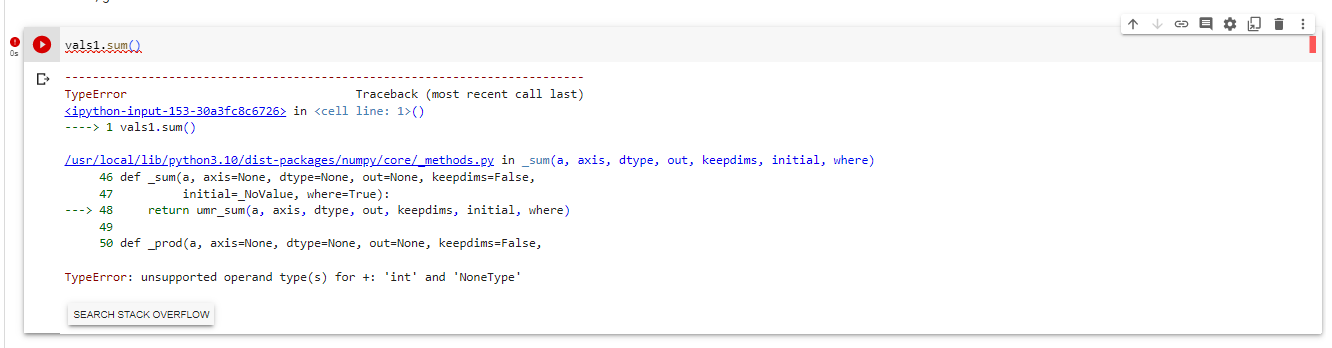

##NaN: Dados numéricos ausentes

A outra representação de dados ausentes, NaN(acrônimo para Not a Number ), é diferente; é um valor de ponto flutuante especial reconhecido por todos os sistemas que usam a representação de ponto flutuante IEEE padrão.

In [195]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

Observe que NumPy escolheu um tipo de ponto flutuante nativo para esta matriz: isso significa que, ao contrário da matriz de objetos anterior, esta matriz suporta operações rápidas inseridas no código compilado. Você deve estar ciente de que NaNé um pouco como um vírus de dados – ele infecta qualquer outro objeto que toca. Independente da operação, o resultado da aritmética com NaNserá outro NaN:

as agregações sobre os valores são bem definidas (ou seja, não resultam em erro), mas nem sempre são úteis.
O NumPy fornece algumas agregações especiais que irão ignorar esses valores ausentes:

In [196]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

## Operando em valores nulos

Como vimos, o Pandas trata Nonee NaNcomo essencialmente intercambiáveis ​​para indicar valores ausentes ou nulos. Para facilitar essa convenção, existem vários métodos úteis para detectar, remover e substituir valores nulos nas estruturas de dados do Pandas. Eles são:

* isnull(): Gera uma máscara booleana indicando valores ausentes
* notnull(): Oposto deisnull()
* dropna(): retorna uma versão filtrada dos dados
* fillna(): Retorna uma cópia dos dados com valores ausentes preenchidos ou imputados

In [197]:
data = pd.Series([1, np.nan, 'hello', None])
print(data)
data.isnull()

0        1
1      NaN
2    hello
3     None
dtype: object


0    False
1     True
2    False
3     True
dtype: bool

Essa mascara pode ser utlizada como vetor de indices nas series ou dataframes

In [198]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [199]:
#removendo o valor de NA

In [200]:
data.dropna()

0        1
2    hello
dtype: object


Considerando um DataFrame, não podemos descartar valores únicos; só podemos descartar linhas completas ou colunas completas. Dependendo do aplicativo, você pode querer um ou outro, então `dropna()` oferece várias opções para um arquivo `DataFrame`.

Por padrão, `dropna()` descartará todas as linhas nas quais qualquer valor nulo estiver presente:

In [201]:
df  =  pd . DataFrame ([[ 1 ,       np . nan ,  2 ], 
                   [ 2 ,       3 ,       5 ], 
                   [ np . nan ,  4 ,       6 ]]) 
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [202]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Como alternativa, você pode descartar os valores de NA ao longo de um eixo diferente; axis=1descarta todas as colunas contendo um valor nulo:

In [203]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


Mas isso também elimina alguns bons dados; você pode preferir descartar linhas ou colunas com todos os valores NA ou a maioria dos valores NA. Isso pode ser especificado por meio dos parâmetros howou thresh, que permitem um controle preciso do número de nulos a serem permitidos.

O padrão é `how='any`', de modo que qualquer linha ou coluna (dependendo da `axis` palavra-chave) contendo um valor nulo será descartada. Você também pode especificar `how='all'`, que descartará apenas linhas/colunas que sejam todos valores nulos:

In [204]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [205]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


Para um controle mais refinado, o threshparâmetro permite especificar um número mínimo de valores não nulos para a linha/coluna a ser mantida:

In [206]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


# Indexação Hierárquica


odemos criar um multi-índice a partir das tuplas da seguinte maneira:

In [207]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]


index = pd.MultiIndex.from_tuples(index)
index    

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

Observe que `MultiIndex` contém vários níveis de indexação – neste caso, os nomes dos estados e os anos, bem como vários rótulos para cada ponto de dados que codificam esses níveis

In [208]:
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Aqui, as duas primeiras colunas da Seriesrepresentação mostram os vários valores de índice, enquanto a terceira coluna mostra os dados. Observe que algumas entradas estão faltando na primeira coluna: nessa representação de vários índices, qualquer entrada em branco indica o mesmo valor da linha acima dela.
O exemplo acima é uma suposição para rastrear dados sobre estados de dois anos diferentes em que indices multiplos torna uma aplicação interessante.

Dessa forma, por exemplo, podemos acessar todos os dados para os quais o segundo índice é 2010, podemos simplesmente usar a notação de corte Pandas:

In [209]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

Você pode notar algo mais aqui: poderíamos facilmente ter armazenado os mesmos dados usando um simples `DataFrame` com rótulos de índice e coluna. Na verdade, o Pandas é construído com essa equivalência em mente. O `unstack()`método converterá rapidamente uma multiplicação indexada Seriesem uma indexada convencionalmente `DataFrame`:

In [210]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


assim como pudemos usar a indexação múltipla para representar dados bidimensionais em um `Series`, também podemos usá-la para representar dados de três ou mais dimensões em um Seriesou DataFrame. Cada nível extra em um índice múltiplo representa uma dimensão extra de dados; aproveitar essa propriedade nos dá muito mais flexibilidade nos tipos de dados que podemos representar. Concretamente, podemos querer adicionar outra coluna de dados demográficos para cada estado a cada ano (digamos, população com menos de 18 anos); com MultiIndexisso é tão fácil quanto adicionar outra coluna ao `DataFrame`:

In [211]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

A maneira mais direta de construir um índice múltiplo Seriesou DataFrameé simplesmente passar uma lista de dois ou mais arrays de índice para o construtor. Por exemplo:

In [212]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.853077  0.097323
  2  0.755397  0.522298
b 1  0.711056  0.975888
  2  0.776063  0.857907

Da mesma forma, se você passar um dicionário com tuplas apropriadas como chaves, o Pandas reconhecerá isso automaticamente e usará a MultiIndexpor padrão:

In [213]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

Para obter mais flexibilidade em como o índice é construído, você pode usar os construtores de método de classe disponíveis no arquivo pd.MultiIndex. Por exemplo, como fizemos antes, você pode construir a MultiIndexpartir de uma lista simples de arrays fornecendo os valores de índice dentro de cada nível:

In [214]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Às vezes é conveniente nomear os níveis do arquivo `MultiIndex`. Isso pode ser feito passando o namesargumento para qualquer um dos `MultiIndex` construtores acima ou definindo o `names` atributo do índice após o fato:

In [215]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Em um DataFrame, as linhas e colunas são completamente simétricas e, assim como as linhas podem ter vários níveis de índices, as colunas também podem ter vários níveis. Considere o seguinte, que é um modelo de alguns dados médicos (um tanto realistas)

In [216]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], #produto cartesiano
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      26.0  37.8  38.0  38.2  51.0  37.6
     2      18.0  36.8  26.0  37.5  16.0  34.6
2014 1      29.0  35.2  50.0  37.9  34.0  34.5
     2      40.0  36.1  42.0  35.2  34.0  36.9

Aqui vemos onde a indexação múltipla para linhas e colunas pode ser muito útil. São dados fundamentalmente quadridimensionais, onde as dimensões são o assunto, o tipo de medição, o ano e o número da visita. Com isso, podemos, por exemplo, indexar a coluna de nível superior pelo nome da pessoa e obter um full DataFramecontendo apenas as informações dessa pessoa:

In [217]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      38.0  38.2
     2      26.0  37.5
2014 1      50.0  37.9
     2      42.0  35.2

O MultiIndextambém oferece suporte à indexação parcial ou à indexação de apenas um dos níveis no índice. O resultado é outro Series, com os índices de nível inferior mantidos:

In [218]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [219]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [220]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

Com índices classificados, a indexação parcial pode ser realizada em níveis inferiores passando uma fatia vazia no primeiro índice:

In [221]:
pop[:,  2000 ]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

É possível converter um conjunto de dados de um multi-índice empilhado em uma representação bidimensional simples, especificando opcionalmente o nível a ser usado

In [222]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [223]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [224]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


# Combinando conjuntos de dados: concatenar e anexar
Alguns dos estudos de dados mais interessantes vêm da combinação de diferentes fontes de dados. Essas operações podem envolver qualquer coisa, desde uma concatenação muito direta de dois conjuntos de dados diferentes até junções e mesclagens mais complicadas no estilo de banco de dados que lidam corretamente com quaisquer sobreposições entre os conjuntos de dados. Seriese DataFrames são construídos com esse tipo de operação em mente, e o Pandas inclui funções e métodos que tornam esse tipo de disputa de dados rápida e direta.
Aqui veremos uma concatenação simples de Seriese DataFrames com a pd.concatfunção; mais tarde, vamos mergulhar em fusões e junções na memória mais sofisticadas implementadas no Pandas.

In [225]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


O Pandas tem uma função, pd.concat(), que possui uma sintaxe semelhante, `np.concatenate`.

In [226]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [227]:
#classe para imprimir dataframes lado a lado
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

In [228]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Por padrão, a concatenação ocorre por linha dentro do `DataFrame`(ou seja, `axis=0`). Como np.concatenate, `pd.concat` permite a especificação de um eixo ao longo do qual a concatenação ocorrerá. Considere o seguinte exemplo:

In [229]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

Uma diferença importante entre np.concatenatee pd.concaté que a concatenação do Pandas preserva os índices , mesmo que o resultado tenha índices duplicados! Considere este exemplo simples:

In [230]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Se você quiser simplesmente verificar se os índices no resultado de `pd.concat()`não se sobrepõem, especifique o `verify_integrity` sinalizador. Com isso definido como True, a concatenação gerará uma exceção se houver índices duplicados. Aqui está um exemplo, onde para maior clareza, vamos capturar e imprimir a mensagem de erro:

In [231]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


Às vezes, o próprio índice não importa e você prefere que ele seja simplesmente ignorado. Esta opção pode ser especificada usando o ignore_indexsinalizador. Com isso definido como verdadeiro, a concatenação criará um novo índice inteiro para o resultado Series

In [232]:
display ( 'x' ,  'y' ,  'pd.concat([x, y], ignore_index=True)' )

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


Outra opção é usar a keysopção de especificar um rótulo para as fontes de dados; o resultado será uma série indexada hierarquicamente contendo os dados:

In [233]:
display ( 'x' ,  'y' ,  "pd.concat([x, y], keys=['x', 'y'])" )

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

# Combinando conjuntos de dados: mesclar e unir
Um recurso essencial oferecido pelo Pandas são suas operações de junção e mesclagem de alto desempenho na memória. Se você já trabalhou com bancos de dados, deve estar familiarizado com esse tipo de interação de dados. A principal interface para isso é a pd.mergefunção, e veremos alguns exemplos de como isso pode funcionar na prática.

A pd.merge()função implementa vários tipos de junções: as junções um-para-um , muitos-para-um e muitos-para-muitos . Todos os três tipos de junções são acessados ​​por meio de uma chamada idêntica à pd.merge()interface; o tipo de junção realizada depende da forma dos dados de entrada.

##Junções um-para-um 

In [234]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


Para combinar essas informações em um único DataFrame, podemos usar a pd.merge()função:

In [235]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


A `pd.merge()` função reconhece que cada um DataFrame tem uma coluna "funcionário" e junta-se automaticamente usando esta coluna como uma chave. O resultado da fusão é um novo DataFrameque combina as informações das duas entradas. Observe que a ordem das entradas em cada coluna não é necessariamente mantida: nesse caso, a ordem da coluna "funcionário" difere entre `df1` e `df2`, e a `pd.merge()` função considera isso corretamente. Além disso, lembre-se de que a mesclagem em geral descarta o índice, exceto no caso especial de mesclagens por índice

## Junções de muitos para um
Junções muitos-para-um são junções nas quais uma das duas colunas-chave contém entradas duplicadas. Para o caso muitos-para-um, o resultado DataFramepreservará essas entradas duplicadas conforme apropriado. Considere o seguinte exemplo de uma junção muitos-para-um:

In [236]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

As junções muitos-para-muitos são um pouco confusas conceitualmente, mas, no entanto, são bem definidas. Se a coluna-chave na matriz esquerda e direita contiver duplicatas, o resultado será uma mesclagem de muitos para muitos. Talvez isso fique mais claro com um exemplo concreto. Considere o seguinte, onde mostramos DataFrameuma ou mais habilidades associadas a um determinado grupo. Ao realizar uma junção muitos-para-muitos, podemos recuperar as habilidades associadas a qualquer pessoa individual:

In [237]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


##Especificação da Chave de Mesclagem
já vimos o comportamento padrão de `pd.merge()`: ele procura por um ou mais nomes de coluna correspondentes entre as duas entradas e usa isso como a chave. No entanto, muitas vezes os nomes das colunas não correspondem tão bem e `pd.merge()`fornecem uma variedade de opções para lidar com isso.


De maneira mais simples, você pode especificar explicitamente o nome da coluna-chave usando a `on` palavra-chave, que recebe um nome de coluna ou uma lista de nomes de colunas:

In [238]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

Às vezes, você pode querer mesclar dois conjuntos de dados com nomes de colunas diferentes; por exemplo, podemos ter um conjunto de dados no qual o nome do funcionário é rotulado como "nome" em vez de "funcionário". Nesse caso, podemos usar as palavras-chave `left_one` `right_on` para especificar os nomes das duas colunas:

In [239]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

Observe a criação de uma coluna redundante com o nome `name`. É possível eliminar da seguinte forma, utilizando a função `drop` pd

In [240]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [241]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


Existe a função `join`, cuja finalidade é unir indices

In [242]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [243]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

Alguns dados não podem ser compleatado em todos atributos, por isso, a junção uniu apenas as linhas com dados completos. Isso seria equivalente ao fazer:

In [244]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Existe uma forma de preencher os dados que estão falatando e forçar uma união com todos atributos, que seria da seguinte forma:

In [245]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

Por fim, você pode acabar em um caso em que seus dois input DataFrames têm nomes de colunas conflitantes. Considere este exemplo:

In [246]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

a junção anexa um sufixo, como pode ser observado em x e y

# Agregação e Agrupamento

Uma parte essencial da análise de dados grandes é a sumarização eficiente: computar agregações como `sum()`, `mean()`, , e , em que um único número fornece informações sobre a natureza de um conjunto de dados potencialmente grande.

Assim como em uma matriz NumPy unidimensional, para um Pandas, Seriesas agregações retornam um único valor:

In [247]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [248]:
ser.sum()

2.811925491708157

In [249]:
ser.mean()

0.5623850983416314

Para um DataFrame, por padrão, as agregações retornam resultados dentro de cada coluna:

In [250]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [251]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

Ao especificar o axisargumento, você pode agregar dentro de cada linha:

In [252]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Além de o pandas ter todas as agregações vistas anteriormente. existe um método de conveniência `describe()` que calcula várias agregações comuns para cada coluna e retorna o resultado.

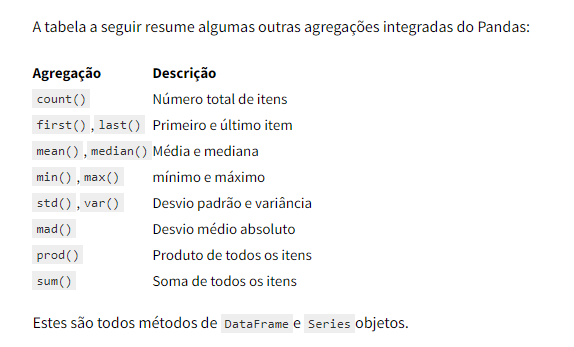

##GroupBy: Dividir, Aplicar, Combinar

Agregações simples podem fornecer uma amostra do seu conjunto de dados, mas geralmente preferimos agregar condicionalmente em algum rótulo ou índice: isso é implementado na chamada groupbyoperação. O nome "agrupar por" vem de um comando na linguagem de banco de dados SQL, mas talvez seja mais esclarecedor pensar nisso nos termos cunhados pela primeira vez por Hadley Wickham da fama do Rstats: dividir, aplicar, combinar .

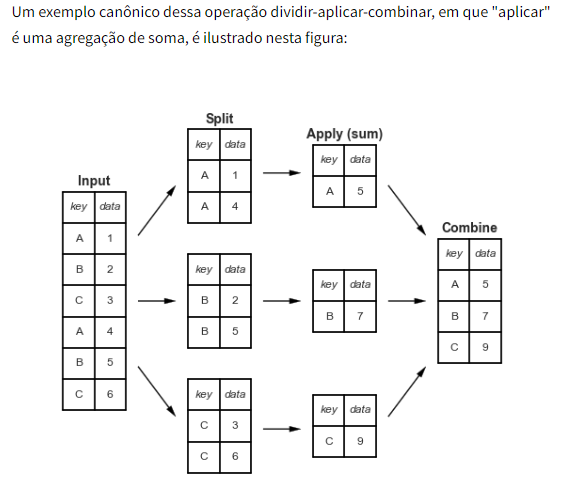

Isso deixa claro o que o `groupby` realiza:

* A etapa de divisão envolve dividir e agrupar um DataFramedependendo do valor da chave especificada.
* A etapa de aplicação envolve o cálculo de alguma função, geralmente uma agregação, transformação ou filtragem, dentro dos grupos individuais.
* A etapa de combinação mescla os resultados dessas operações em uma matriz de saída.

In [253]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [254]:
df.groupby('key')

Observe que o que é retornado não é um conjunto de DataFrames, mas um `DataFrameGroupBy` objeto. Este objeto é onde está a mágica: você pode pensar nele como uma visão especial do DataFrame, que está preparada para se aprofundar nos grupos, mas não faz nenhum cálculo real até que a agregação seja aplicada. Essa abordagem de "avaliação preguiçosa" significa que agregados comuns podem ser implementados com muita eficiência de uma forma quase transparente para o usuário.

Para produzir um resultado, podemos aplicar um agregado a este `DataFrameGroupBy` objeto, que executará as etapas de aplicação/combinação apropriadas para produzir o resultado desejado:

In [255]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


Em particular, GroupByos objetos têm métodos `aggregate()`, `filter()`, transform()e `apply()` que implementam eficientemente uma variedade de operações úteis antes de combinar os dados agrupados.

In [256]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


Agora estamos familiarizados com GroupByagregações com `sum()`, `median()` e similares, mas o `aggregate()` método permite ainda mais flexibilidade. Ele pode pegar uma string, uma função ou uma lista deles e calcular todos os agregados de uma vez. Aqui está um exemplo rápido que combina tudo isso:

In [257]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Outro padrão útil é passar nomes de coluna de mapeamento de dicionário para operações a serem aplicadas nessa coluna:

In [258]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


Uma operação de filtragem permite descartar dados com base nas propriedades do grupo. Por exemplo, podemos querer manter todos os grupos nos quais o desvio padrão é maior que algum valor crítico:

In [259]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

Enquanto a agregação deve retornar uma versão reduzida dos dados, a transformação pode retornar alguma versão transformada dos dados completos para recombinação. Para tal transformação, a saída tem a mesma forma que a entrada. Um exemplo comum é centralizar os dados subtraindo a média do grupo:

In [260]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


O apply() método permite aplicar uma função arbitrária aos resultados do grupo. A função deve receber um `DataFrame` e retornar um objeto Pandas (por exemplo, `DataFrame`, `Series`) ou um escalar; a operação de combinação será adaptada ao tipo de saída retornada.

In [261]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

<string>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
<string>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


`apply()` dentro de a GroupByé bastante flexível: o único critério é que a função pegue a DataFramee retorne um objeto Pandas ou escalar; o que você faz no meio é com você!

#Tabelas Dinâmicas
Uma tabela dinâmica é uma operação semelhante comumente vista em planilhas e outros programas que operam com dados tabulares. A tabela dinâmica usa dados simples em colunas como entrada e agrupa as entradas em uma tabela bidimensional que fornece um resumo multidimensional dos dados. A diferença entre tabelas dinâmicas e GroupByàs vezes pode causar confusão; isso me ajuda a pensar em tabelas dinâmicas como essencialmente uma versão multidimensional de GroupByagregação. Ou seja, você divide-aplica-combina, mas tanto a divisão quanto a combinação acontecem não em um índice unidimensional, mas em uma grade bidimensional.

In [262]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [263]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**Tabela dinamica em vários niveis** 

Assim como no `GroupBy`, o agrupamento em tabelas dinâmicas pode ser especificado com vários níveis e por meio de várias opções. Por exemplo, podemos estar interessados ​​em olhar para a idade como uma terceira dimensão. Vamos classificar a idade usando a `pd.cutfunção`:

In [264]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Podemos aplicar a mesma estratégia ao trabalhar com as colunas também; vamos adicionar informações sobre a tarifa paga usando `pd.qcut` para calcular quantis automaticamente:

In [265]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

Existem algumas opções no argumento do `pivot_table`
```
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```



A `aggfunc` palavra-chave controla que tipo de agregação é aplicada, o que é uma média por padrão. Como no GroupBy, a especificação de agregação pode ser uma string representando uma das várias opções comuns (por exemplo, 'sum', 'mean', 'count', 'min', 'max'etc.) ou uma função que implementa uma agregação (por exemplo, np.sum(), min(), sum(), etc.). Além disso, pode ser especificado como um dicionário mapeando uma coluna para qualquer uma das opções desejadas acima:

In [266]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Às vezes é útil calcular totais ao longo de cada agrupamento. Isso pode ser feito através da `margins` palavra-chave:

In [267]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)


class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#Operações de String Vetorizadas
Um ponto forte do Python é sua relativa facilidade em lidar e manipular dados de string. O Pandas se baseia nisso e fornece um conjunto abrangente de operações de cadeia de caracteres vetorizadas que se tornam uma peça essencial do tipo de munging necessário ao trabalhar com (leia-se: limpar) dados do mundo real.

O Pandas inclui recursos para atender a essa necessidade de operações de string vetorizada e para lidar corretamente com os dados ausentes por meio do stratributo de objetos Pandas `Series` e `Index` contendo strings. Então, por exemplo, suponha que criamos uma série Pandas com esses dados:

In [268]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [269]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

Segue o seguinte exemplo com strings de nomes

In [270]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

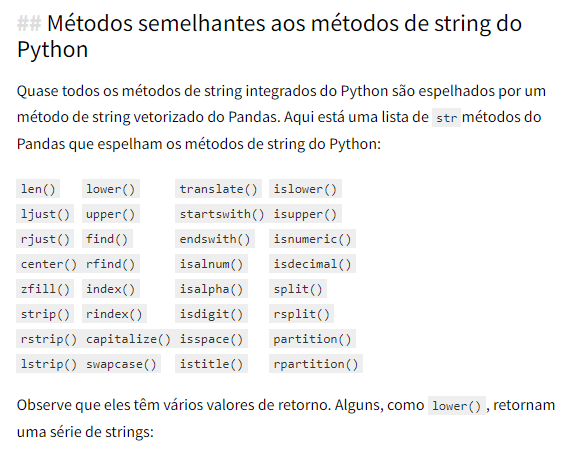

In [271]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [272]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [273]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

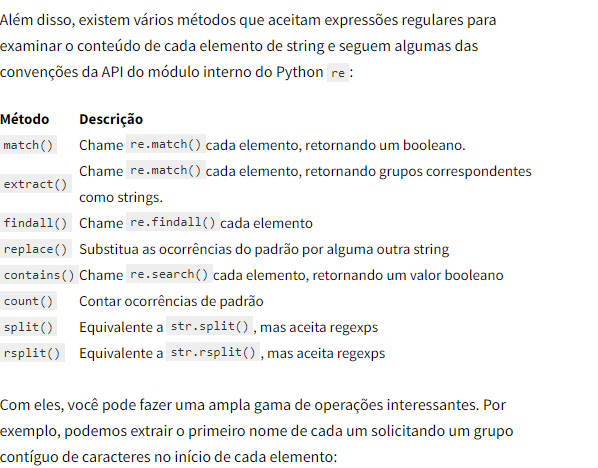

In [274]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

Com eles, você pode fazer uma ampla gama de operações interessantes. Por exemplo, podemos extrair o primeiro nome de cada um solicitando um grupo contíguo de caracteres no início de cada elemento:

In [275]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

existem alguns métodos diversos que permitem outras operações convenientes:
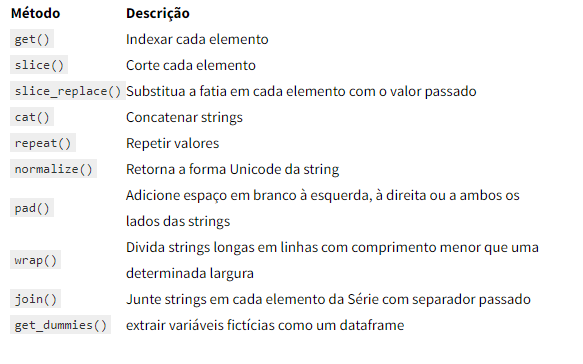

Outro método que requer um pouco de explicação extra é o `get_dummies()` método. Isso é útil quando seus dados possuem uma coluna contendo algum tipo de indicador codificado. Por exemplo, podemos ter um conjunto de dados que contém informações na forma de códigos, como A="nascido na América", B="nascido no Reino Unido", C="gosta de queijo", D="gosta de spam" :

In [276]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


A `get_dummies()` rotina permite que você divida rapidamente essas variáveis ​​de indicador em DataFrame:

In [277]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


Com essas operações como blocos de construção, você pode construir uma gama infinita de procedimentos de processamento de strings ao limpar seus dados.

#Trabalhando com séries temporais

Pandas foi desenvolvido no contexto de modelagem financeira, então, como você pode esperar, ele contém um conjunto bastante extenso de ferramentas para trabalhar com datas, horas e dados indexados por hora. Os dados de data e hora vêm em alguns tipos, que discutiremos aqui:

* Os carimbos de data/hora fazem referência a momentos específicos no tempo (por exemplo, 4 de julho de 2015 às 7h).
* Os intervalos de tempo e os períodos referem-se a um período de tempo entre um determinado ponto inicial e final; por exemplo, o ano de 2015. Os períodos geralmente fazem referência a um caso especial de intervalos de tempo em que cada intervalo é de duração uniforme e não se sobrepõe (por exemplo, períodos de 24 horas compreendendo dias).
* Deltas de tempo ou durações referem-se a um período de tempo exato (por exemplo, uma duração de 22,56 segundos).

##Datas com o numpy

O numpy oferece suporte para trabalhar com datas e pode ser da seguinte forma

In [278]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Uma vez que tenhamos esta data formatada, no entanto, podemos rapidamente fazer operações vetorizadas sobre ela:

In [279]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

##Datas e horários em pandas
O pandas se baseia nos recursos de datas padrão do python no `datetime64` do numpy, desta forma, podemos repetir o processo da seguinte forma:

In [280]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [281]:
date.strftime('%A')

'Saturday'

In [282]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

Onde as ferramentas de séries temporais do Pandas realmente se tornam úteis é quando você começa a indexar dados por timestamps . Por exemplo, podemos construir um `Series` objeto que tenha dados indexados por tempo:

In [283]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Agora que temos esses dados em um Series, podemos usar qualquer um dos Seriespadrões de indexação que discutimos anteriormente, passando valores que podem ser convertidos em datas:

In [284]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

Existem operações especiais adicionais de indexação somente de data, como passar um ano para obter uma fatia de todos os dados desse ano:

In [285]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

##Pandas Time Series Data Structures
Esta seção apresentará as estruturas de dados fundamentais do Pandas para trabalhar com dados de séries temporais:

* Para `timestamps` , o Pandas fornece o Timestamp tipo. Como mencionado anteriormente, é essencialmente um substituto para o nativo do Python datetime, mas é baseado no numpy.datetime64tipo de dados mais eficiente. A estrutura de índice associada é DatetimeIndex.
* Para períodos de tempo , o Pandas fornece o `Period` tipo. Isso codifica um intervalo de frequência fixa baseado em numpy.datetime64. A estrutura de índice associada é PeriodIndex.
* Para deltas de tempo ou durações , o Pandas fornece o `Timedel` tatipo. Timedeltaé um substituto mais eficiente para datetime.timedeltao tipo nativo do Python e é baseado em numpy.timedelta64. A estrutura de índice associada é TimedeltaIndex.

 mais fundamental desses objetos de data/hora são os objetos `Timestampe` `DatetimeIndex`. Embora esses objetos de classe possam ser chamados diretamente, é mais comum usar a `pd.to_datetime()` função, que pode analisar uma ampla variedade de formatos. Passar uma única data para `pd.to_datetime()` produz um `Timestamp`; passar uma série de datas por padrão gera um DatetimeIndex:

In [286]:
from datetime import datetime

In [287]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Qualquer um `DatetimeIndex` pode ser convertido em um `PeriodIndex` com a `to_period()` função com a adição de um código de frequência; aqui usaremos `'D'` para indicar a frequência diária:

In [288]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

## Sequência Regulares `pd.date_range()`

Para tornar a criação de sequências de datas regulares mais conveniente, o Pandas oferece algumas funções para essa finalidade: `pd.date_range()` para timestamps, `pd.period_range()` para períodos e pd.timedelta_range()para deltas de tempo. Vimos que Python `range()` e NumPy `np.arange()`transformam um ponto de início, um ponto de extremidade e um tamanho de etapa opcional em uma sequência. Da mesma forma, `pd.date_range()`aceita uma data inicial, uma data final e um código de frequência opcional para criar uma sequência regular de datas. Por padrão, a frequência é de um dia.

In [289]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [290]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

O espaçamento pode ser modificado alterando o freqargumento, cujo padrão é D. Por exemplo, aqui vamos construir um intervalo de timestamps por hora:

In [291]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Para criar sequências regulares de `Period` ou `Timedelta` valores, as funções muito semelhantes `pd.period_range()` e `pd.timedelta_range()` são úteis. Aqui estão alguns períodos mensais:

In [292]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [293]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

É possivel combinar os códigos com números para especificar outras frequências. Por exemplo, para uma frequência de 2 horas e 30 minutos, podemos combinar os códigos de hora `( H)` e minuto `( T)` da seguinte forma:

In [294]:
pd.timedelta_range(0, periods=9, freq="2H30T")


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

#Pandas de alto desempenho: eval() e query()

Como já vimos nas seções anteriores, o poder da pilha PyData é construído sobre a capacidade de NumPy e Pandas de enviar operações básicas para C por meio de uma sintaxe intuitiva: exemplos são operações vetorizadas/transmitidas em NumPy e operações do tipo agrupamento em Pandas. Embora essas abstrações sejam eficientes e eficazes para muitos casos de uso comuns, elas geralmente dependem da criação de objetos intermediários temporários, o que pode causar sobrecarga indevida no tempo computacional e no uso da memória.

A partir da versão 0.13 (lançada em janeiro de 2014), o Pandas inclui algumas ferramentas experimentais que permitem acessar diretamente as operações em velocidade C sem alocação dispendiosa de arrays intermediários. Estas são as funções eval()e query(), que dependem do pacote Numexpr . 

`pandas.eval()` para operações eficientes 
A `eval()` função em Pandas usa expressões de string para computar operações usando DataFrames de forma eficiente. Por exemplo, considere os seguintes `DataFrames`:

In [295]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

Para calcular a soma de todos os quatro DataFrames usando a abordagem típica do Pandas, podemos apenas escrever a soma:

In [296]:
%timeit df1 + df2 + df3 + df4

108 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


O mesmo resultado pode ser calculado pd.evalconstruindo a expressão como uma string:

In [297]:
%timeit pd.eval('df1 + df2 + df3 + df4')

52.7 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


A operação seria a mesma, a diferença no tempo é porque o método `eval()` aproveita a capacidade de avaliação rápida de expressões usando mecanismos de baixo nível, como a biblioteca Numexpr.

Assim como o Pandas tem uma `pd.eval()` função de nível superior, DataFrameos s têm um `eval()` método que funciona de maneira semelhante. O benefício do `eval()`método é que as colunas podem ser referenciadas pelo nome . Usaremos esse array rotulado como exemplo:

In [298]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.615875,0.525167,0.047354
1,0.330858,0.412879,0.441564
2,0.689047,0.559068,0.230350
3,0.290486,0.695479,0.852587
4,0.424280,0.534344,0.245216


Usando `pd.eval()` como acima, podemos calcular expressões com as três colunas como esta:

In [300]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

O `DataFrame.eval()` método permite uma avaliação muito mais sucinta das expressões com as colunas:

In [301]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

In [302]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.615875,0.525167,0.047354,24.095868
1,0.330858,0.412879,0.441564,1.684325
2,0.689047,0.559068,0.230350,5.418335
3,0.290486,0.695479,0.852587,1.156439
4,0.424280,0.534344,0.245216,3.909296


## Método DataFrame.query() 
O DataFrametem outro método baseado em strings avaliadas, chamado `query()`método. Considere o seguinte:

In [303]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [304]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

A função `query()` é usada para filtrar linhas de um DataFrame com base em uma expressão booleana. Essa expressão é especificada como uma string e pode conter referências a colunas do DataFrame. A função` query()` avalia a expressão e retorna apenas as linhas que atendem à condição especificada. Aqui está um exemplo de uso do `query()`

Por outro lado, a função `eval()` é usada para avaliar expressões em uma string, que são interpretadas e executadas pelo pandas. Essas expressões podem envolver operações matemáticas, operações de colunas ou funções do NumPy. A função `eval()` retorna o resultado da expressão especificada